## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

### 使用nesterov

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0715 20:04:15.126576  7260 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 20:04:15.134577  7260 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 20:04:15.211581  7260 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0715 20:04:15.350589  7260 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0210 - acc: 0.2513 - val_loss: 1.9071 - val_acc: 0.3144
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7875 - acc: 0.3545 - val_loss: 1.7847 - val_acc: 0.3636
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7158 - acc: 0.3870 - val_loss: 1.7318 - val_acc: 0.3766
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7039 - acc: 0.3917 - val_loss: 1.7294 - val_acc: 0.3817
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6654 - acc: 0.4049 - val_loss: 1.6845 - val_acc: 0.3966
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6490 - acc: 0.4130 - val_loss: 1.7297 - val_acc: 0.3929
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6295 - acc: 0.4218 - val_loss: 1.7833 - 

50000/50000 [==============================] - 6s 127us/step - loss: 1.8255 - acc: 0.3499 - val_loss: 1.6559 - val_acc: 0.4106
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6011 - acc: 0.4324 - val_loss: 1.6239 - val_acc: 0.4200
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5124 - acc: 0.4648 - val_loss: 1.5211 - val_acc: 0.4539
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4556 - acc: 0.4820 - val_loss: 1.4956 - val_acc: 0.4767E
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4060 - acc: 0.5002 - val_loss: 1.4318 - val_acc: 0.4917
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3585 - acc: 0.5151 - val_loss: 1.4270 - val_acc: 0.4906
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.3218 - acc: 0.5283 - val_loss: 1.3912 - val_acc: 0.5065
Epoch 8/50
50000/50000 [====================

50000/50000 [==============================] - 6s 116us/step - loss: 1.7933 - acc: 0.3712 - val_loss: 1.7452 - val_acc: 0.3850
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7087 - acc: 0.4020 - val_loss: 1.6770 - val_acc: 0.4134
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6511 - acc: 0.4231 - val_loss: 1.6230 - val_acc: 0.4329
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6034 - acc: 0.4392 - val_loss: 1.5883 - val_acc: 0.4430
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5640 - acc: 0.4532 - val_loss: 1.5659 - val_acc: 0.4491
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5279 - acc: 0.4644 - val_loss: 1.5446 - val_acc: 0.4500
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4974 - acc: 0.4732 - val_loss: 1.5187 - val_acc: 0.4611
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 122us/step - loss: 2.0490 - acc: 0.2795 - val_loss: 2.0185 - val_acc: 0.2885
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.9915 - acc: 0.3032 - val_loss: 1.9706 - val_acc: 0.3055
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9493 - acc: 0.3203 - val_loss: 1.9337 - val_acc: 0.3259
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.9167 - acc: 0.3317 - val_loss: 1.9051 - val_acc: 0.3355
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8909 - acc: 0.3422 - val_loss: 1.8823 - val_acc: 0.3420
Epoch 8/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8698 - acc: 0.3483 - val_loss: 1.8626 - val_acc: 0.3503
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8514 - acc: 0.3548 - val_loss: 1.8473 - val_acc: 0.3550
Epoch 10/50
50000/50000 [====================

Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2307 - acc: 0.1903 - val_loss: 2.2244 - val_acc: 0.1896
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.2131 - acc: 0.2058 - val_loss: 2.2076 - val_acc: 0.2025
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.1968 - acc: 0.2179 - val_loss: 2.1922 - val_acc: 0.2138
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1818 - acc: 0.2281 - val_loss: 2.1778 - val_acc: 0.2209
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1679 - acc: 0.2380 - val_loss: 2.1645 - val_acc: 0.2287
Epoch 9/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1551 - acc: 0.2449 - val_loss: 2.1521 - val_acc: 0.2371
Epoch 10/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1429 - acc: 0.2515 - val_loss: 2.1403 - val_acc: 0.2414
Epoch 11/50
50000/50000 [========

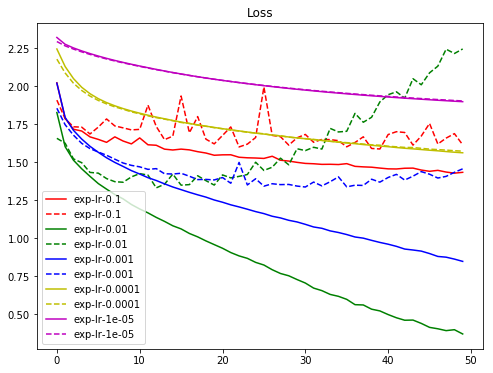

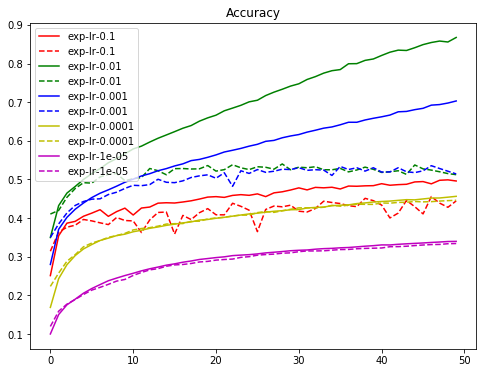

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 不使用nesterov

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8732 - acc: 0.3237 - val_loss: 1.7175 - val_acc: 0.3861
Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.6683 - acc: 0.4024 - val_loss: 1.6035 - val_acc: 0.4285
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5832 - acc: 0.4355 - val_loss: 1.5713 - val_acc: 0.43905912 - - ETA: 1s - lo
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5294 - acc: 0.4531 - val_loss: 1.5282 - val_acc: 0.4567
Epoch 5/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4901 - acc: 0.4691 - val_loss: 1.4784 - val_acc: 0.4702
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4524 - acc: 0.4823 - val_loss: 1.4466 - val_acc: 0.4860
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4084 - acc: 0.4997 

50000/50000 [==============================] - 7s 134us/step - loss: 2.0339 - acc: 0.2679 - val_loss: 1.8642 - val_acc: 0.3497
Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.8182 - acc: 0.3608 - val_loss: 1.7722 - val_acc: 0.3778
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7355 - acc: 0.3867 - val_loss: 1.7042 - val_acc: 0.4016
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.6854 - acc: 0.4038 - val_loss: 1.6698 - val_acc: 0.4179
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6286 - acc: 0.4254 - val_loss: 1.6266 - val_acc: 0.4258
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5917 - acc: 0.4401 - val_loss: 1.5885 - val_acc: 0.4392
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5599 - acc: 0.4489 - val_loss: 1.5814 - val_acc: 0.4430
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 127us/step - loss: 2.2670 - acc: 0.1583 - val_loss: 2.1889 - val_acc: 0.2188
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.1455 - acc: 0.2425 - val_loss: 2.0973 - val_acc: 0.2722
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0650 - acc: 0.2825 - val_loss: 2.0280 - val_acc: 0.2986
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0050 - acc: 0.3034 - val_loss: 1.9756 - val_acc: 0.3136
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9591 - acc: 0.3198 - val_loss: 1.9364 - val_acc: 0.3271
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9239 - acc: 0.3302 - val_loss: 1.9083 - val_acc: 0.3330
Epoch 7/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8967 - acc: 0.3392 - val_loss: 1.8839 - val_acc: 0.3436
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 133us/step - loss: 2.2793 - acc: 0.1198 - val_loss: 2.2627 - val_acc: 0.1388
Epoch 3/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2554 - acc: 0.1455 - val_loss: 2.2431 - val_acc: 0.1582
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2374 - acc: 0.1649 - val_loss: 2.2264 - val_acc: 0.1752
Epoch 5/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.2217 - acc: 0.1838 - val_loss: 2.2116 - val_acc: 0.1940
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2073 - acc: 0.1964 - val_loss: 2.1977 - val_acc: 0.2068
Epoch 7/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.1938 - acc: 0.2086 - val_loss: 2.1847 - val_acc: 0.2132
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1811 - acc: 0.2183 - val_loss: 2.1723 - val_acc: 0.2215
Epoch 9/50
50000/50000 [=====================

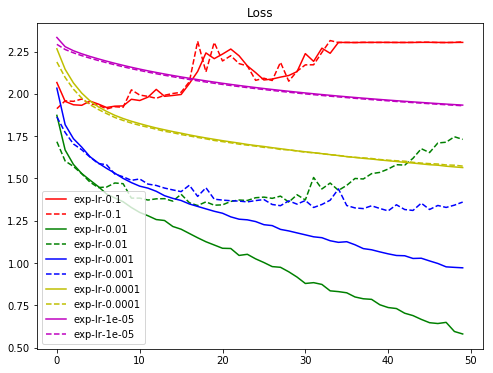

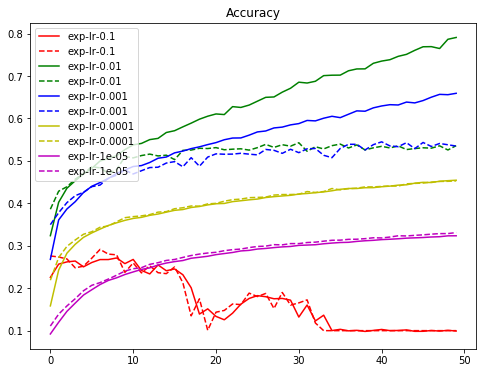

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()